### 7. SVM Implementation.
a)  Write  a  code  in  Python  that  takes  as  input  a  training  dataset{(xi,yi)}i=1 to N, a testing  
set{(x′i)}i=1 to N′, and outputs the parameters of the hyperplane and classification of the training data and test data into the class{−1,+1}. Here, we only use linear SVM. 

 b) Download the dataset of the HW03 on the piazza page. Run the code on the training dataset to compute the hyperplane and evaluate on the test dataset. Report classification error on the trainingset and classification error on the test set.  Plot the data (use different colors for data in differentclasses) and plot the decision boundary found by the SVM.


In [8]:
import scipy.io as sio
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC


import warnings
warnings.filterwarnings('ignore')

Step 1: Loading the dataset

In [9]:
data = sio.loadmat("hw03_dataset.mat")
X_train = data['X_trn']
X_test = data['X_tst']
y_train = data['Y_trn']
y_test = data['Y_tst']

Step 2 : Defining the functions for SVM and classification error

In [10]:
def SVM(X_train, Y_train, X_test):  
    
    model = LinearSVC()
    model.fit(X_train, Y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
        
    return model, y_train_pred, y_test_pred
      
    
def classification_error(y_true, y_pred):
    error = np.sum(y_true != y_pred) / len(y_true) 
    return error


Step3 : Calculating traing and test classification

In [11]:
model, y_train_pred, y_test_pred = SVM(X_train, y_train, X_test)
print(model)

# Getting the hyperplace parameter
hyperplane_param = model.coef_[0]
print(f"Hyperplane parameters are : {hyperplane_param}")

# Finding the classification error
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)                       

print(f'Training classification error is : {round(1-train_accuracy, 3)}')
print(f'Testing classification error is : {round(1-test_accuracy, 3)}')

LinearSVC()
Hyperplane parameters are : [ 1.52976159 -0.48494641]
Training classification error is : 0.024
Testing classification error is : 0.0


We see that training error is 0.024 while testing classification error is 0.

Step4 : Plotting Decision boundaries for train and test data

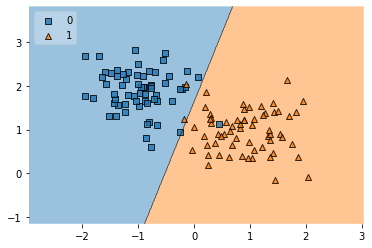

In [12]:
# Train data

y_train = np.reshape(y_train, y_train.shape[0]) 
plot_decision_regions(X=X_train, y=y_train, clf=model, legend=2)

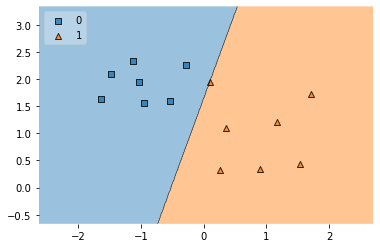

In [13]:
# Test data

y_test = np.reshape(y_test, y_test.shape[0]) 
plot_decision_regions(X=X_test, y=y_test, clf=model, legend=2)